In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/kaggle_compitions/Digit_recognization/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(42000, 785)

In [ ]:
#checking unique numbers in train label column
unique = data['label'].unique()
print(unique)

n_classes = len(unique)
print("Number of classes: ",n_classes)

[1 0 4 7 3 5 8 9 2 6]
Number of classes:  10


In [ ]:
x = data.drop(labels = ["label"], axis=1)
print(x)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42

In [ ]:
y = data['label']
print(y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [ ]:
#Training Data and testing data
print("X_train: ", x_train)
print("X_test: ", y_test)
print("Y_train: ", y_train)
print("Y_test: ", y_test)

X_train:         pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
34941       0       0       0       0  ...         0         0         0         0
24433       0       0       0       0  ...         0         0         0         0
24432       0       0       0       0  ...         0         0         0         0
8832        0       0       0       0  ...         0         0         0         0
30291       0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
6265        0       0       0       0  ...         0         0         0         0
11284       0       0       0       0  ...         0         0         0         0
38158       0       0       0       0  ...         0         0         0         0
860         0       0       0       0  ...         0         0         0         0
15795       0       0       0       0  ...         0         0         0     

In [ ]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [ ]:
print("X_train: ",x_train)
print("X_train: ",x_test)

X_train:  [[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   

In [ ]:
#determine the shape of input images
in_shape = x_train.shape[1:]
print(in_shape)

(28, 28, 1)


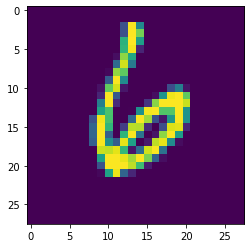

In [ ]:
plt.imshow(x_train[0].reshape([28,28]))

In [ ]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
from numpy import asarray, unique, argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
#define CNN Model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation= 'relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [ ]:
# define loss and optimizer
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose= 1)

Epoch 1/100
210/210 [==============================] - 33s 6ms/step - loss: 0.7076 - accuracy: 0.7746 - val_loss: 0.1654 - val_accuracy: 0.9534
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 0.2301 - accuracy: 0.9315 - val_loss: 0.1047 - val_accuracy: 0.9692
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1495 - accuracy: 0.9542 - val_loss: 0.0864 - val_accuracy: 0.9753
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 0.1074 - accuracy: 0.9669 - val_loss: 0.0737 - val_accuracy: 0.9802
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0812 - accuracy: 0.9763 - val_loss: 0.0689 - val_accuracy: 0.9824
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9776 - val_loss: 0.0707 - val_accuracy: 0.9811
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0658 - val_accuracy: 0.983

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy: %.3f' %accuracy)
print('Loss: ',loss)


263/263 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9860
Accuracy: 0.986
Loss:  0.08817975223064423


In [ ]:
#make a pridiction
image = x_test[1]
ypred = model.predict(asarray([image]))
print('Prediction: Class =%d' %argmax(ypred))

Prediction: Class =1


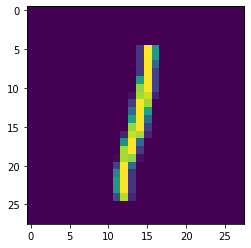

In [ ]:
plt.imshow(x_test[1].reshape([28,28]))

In [ ]:
#Pridict the model on the trained Data
test_data = pd.read_csv('/content/drive/My Drive/kaggle_compitions/Digit_recognization/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = test_data/255.0

In [ ]:
test_final_Data = test.values.reshape(-1,28,28,1)

In [ ]:
label = model.predict(test_final_Data)
print(label)

[[1.7161617e-27 8.7124957e-27 1.0000000e+00 ... 3.6136067e-22
  2.4171183e-30 4.3308259e-32]
 [1.0000000e+00 3.9116958e-24 3.7673918e-20 ... 2.2885315e-17
  8.7006463e-18 1.6264869e-17]
 [5.2802152e-23 4.7904093e-23 2.7272274e-13 ... 2.0550168e-14
  8.8106909e-12 1.0000000e+00]
 ...
 [0.0000000e+00 1.0423571e-23 3.7548293e-32 ... 7.0813608e-30
  4.6228795e-29 3.2623650e-24]
 [7.6319337e-22 1.9137685e-23 4.0931308e-21 ... 2.7521386e-12
  2.4803747e-14 1.0000000e+00]
 [1.5268924e-27 5.3224205e-23 1.0000000e+00 ... 2.3499649e-23
  5.1430952e-19 6.3003645e-21]]


In [ ]:
label.shape

(28000, 10)

In [ ]:
label = np.argmax(label, axis=1)

In [ ]:
print(label)

[2 0 9 ... 3 9 2]


In [ ]:
print(label.shape)

(28000,)


In [ ]:
sample_submission = pd.read_csv('/content/drive/My Drive/kaggle_compitions/Digit_recognization/sample_submission.csv')
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
index = test_data.index.values + 1
data = {'ImageId' : index, "Label" : label}
df = pd.DataFrame(data=data)
df.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submit = pd.DataFrame({'ImageId' : index, "Label" : label.astype(int).ravel()})
submit.to_csv("submission.csv",index = False)

In [ ]:
submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
